In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [124]:
dataset_path = 'dataset.csv'
data = pd.read_csv(dataset_path)
data

Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1              0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2              0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3              0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4              0.618  0.4430  ...    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350  ...   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170  ...   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290  ...   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060  ...   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870  ...   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.97

<h1>Understanding The Data</h1>
<ul>
<li>popularity: (0-100) based on most recent, most played tracks</li>
<li>explicit: (T/F) contains explicit lyrics</li>
<li>danceability: (0.0-1.0) based on tempo, rhythm stability, beat strength</li>
<li>energy: (0.0-1.0) based on fast,loud,and noise</li>
<li>key: 0=C, 1=C#/Db, 2=D</li>
<li>mode: major = 1, minor = 0</li>
<li>speechiness: (0.0-1.0), < 0.33 non-speech like</li>
<li>acousticness: (0.0-1.0)</li>
<li>instructmentalness: (0.0-1.0) 1.0= instrucmental, "Ooh" and "ahh" are treated as instrumental</li>
<li>liveness: Listen for audience, >0.8 is likely live</li>
<li>valence: (0.0-1.0) high=happy, cheerful, euphoric. low = sad, depressed, angry</li>
<li>tempo: BPM</li>
</ul>

<h1>Cleaning of Data</h1>

In [125]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [126]:
data[data["artists"].isnull()]
data.drop([65900], inplace=True)
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [127]:
data

Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1              0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2              0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3              0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4              0.618  0.4430  ...    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350  ...   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170  ...   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290  ...   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060  ...   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870  ...   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.97

In [128]:
#Drop TrackID & Unamed 0
data.drop(['Unnamed: 0', 'track_id','album_name'], axis=1, inplace=True)
data.head()

artists                  track_name  popularity  \
0             Gen Hoshino                      Comedy          73   
1            Ben Woodward            Ghost - Acoustic          55   
2  Ingrid Michaelson;ZAYN              To Begin Again          57   
3            Kina Grannis  Can't Help Falling In Love          71   
4        Chord Overstreet                     Hold On          82   

   duration_ms  explicit  danceability  energy  key  loudness  mode  \
0       230666     False         0.676  0.4610    1    -6.746     0   
1       149610     False         0.420  0.1660    1   -17.235     1   
2       210826     False         0.438  0.3590    0    -9.734     1   
3       201933     False         0.266  0.0596    0   -18.515     1   
4       198853     False         0.618  0.4430    2    -9.681     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.1430        0.0322          0.000001    0.3580    0.715   87.917   
1       0.0763        0.9240          0.000006    0.1010    0.267   77.489   
2       0.0557        0.2100          0.000000    0.1170    0.120   76.332   
3       0.0363        0.9050          0.000071    0.1320    0.143  181.740   
4       0.0526        0.4690          0.000000    0.0829    0.167  119.949   

   time_signature track_genre  
0               4    acoustic  
1               4    acoustic  
2               4    acoustic  
3               3    acoustic  
4               4    acoustic

In [129]:
#Check for duplicate track_name
data[data.duplicated(['track_name'])]

artists                   track_name  \
18                 Jason Mraz;Colbie Caillat                        Lucky   
20                                Jason Mraz                    I'm Yours   
22      A Great Big World;Christina Aguilera                Say Something   
28                                Jason Mraz            Winter Wonderland   
29                                Jason Mraz            Winter Wonderland   
...                                      ...                          ...   
113974                          Chris Tomlin                     Faithful   
113980                             I AM THEY                         Amen   
113987                         Planetshakers           All My Life - Live   
113991                          Chris Tomlin  At The Cross (Love Ran Red)   
113998                      Michael W. Smith                      Friends   

        popularity  duration_ms  explicit  danceability  energy  key  \
18              68       189613     False         0.625   0.414    0   
20              75       242946     False         0.703   0.444   11   
22              70       229400     False         0.407   0.147    2   
28               0       131760     False         0.620   0.309    5   
29               0       131760     False         0.620   0.309    5   
...            ...          ...       ...           ...     ...  ...   
113974          34       285120     False         0.618   0.419    6   
113980          41       238146     False         0.516   0.634    7   
113987          40       246306     False         0.470   0.938   11   
113991          32       250629     False         0.387   0.531    8   
113998          41       283893     False         0.587   0.506    7   

        loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
18        -8.700     1       0.0369      0.294000          0.000000    0.1510   
20        -9.331     1       0.0417      0.559000          0.000000    0.0973   
22        -8.822     1       0.0355      0.857000          0.000003    0.0913   
28        -9.209     1       0.0495      0.788000          0.000000    0.1460   
29        -9.209     1       0.0495      0.788000          0.000000    0.1460   
...          ...   ...          ...           ...               ...       ...   
113974    -6.156     1       0.0279      0.309000          0.000000    0.1070   
113980    -4.850     1       0.0339      0.030000          0.000002    0.0813   
113987    -4.722     0       0.1050      0.000529          0.000000    0.2510   
113991    -4.788     1       0.0290      0.003050          0.000000    0.2010   
113998   -10.889     1       0.0297      0.381000          0.000000    0.2700   

        valence    tempo  time_signature  track_genre  
18       0.6690  130.088               4     acoustic  
20       0.7120  150.960               4     acoustic  
22       0.0765  141.284               3     acoustic  
28       0.6640  145.363               4     acoustic  
29       0.6640  145.363               4     acoustic  
...         ...      ...             ...          ...  
113974   0.3730  131.973               4  world-music  
113980   0.0921   76.994               4  world-music  
113987   0.4530  128.002               4  world-music  
113991   0.1530  146.003               4  world-music  
113998   0.4130  135.960               4  world-music  

[40391 rows x 18 columns]

In [130]:
# Find track_name I'm Yours	
data[data['track_name'] == 'I\'m Yours']
data.drop_duplicates(subset='track_name', keep='first', inplace=True)
data[data['track_name'] == 'I\'m Yours']

artists track_name  popularity  duration_ms  explicit  danceability  \
7  Jason Mraz  I'm Yours          80       242946     False         0.703   

   energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
7   0.444   11    -9.331     1       0.0417         0.559               0.0   

   liveness  valence   tempo  time_signature track_genre  
7    0.0973    0.712  150.96               4    acoustic

In [131]:
data

artists                  track_name  popularity  \
0                  Gen Hoshino                      Comedy          73   
1                 Ben Woodward            Ghost - Acoustic          55   
2       Ingrid Michaelson;ZAYN              To Begin Again          57   
3                 Kina Grannis  Can't Help Falling In Love          71   
4             Chord Overstreet                     Hold On          82   
...                        ...                         ...         ...   
113994          Lucas Cervetti    Frecuencia Álmica, Pt. 4          22   
113995           Rainy Lullaby         Sleep My Little Boy          21   
113996           Rainy Lullaby            Water Into Light          22   
113997           Cesária Evora              Miss Perfumado          22   
113999           Cesária Evora                   Barbincor          22   

        duration_ms  explicit  danceability  energy  key  loudness  mode  \
0            230666     False         0.676  0.4610    1    -6.746     0   
1            149610     False         0.420  0.1660    1   -17.235     1   
2            210826     False         0.438  0.3590    0    -9.734     1   
3            201933     False         0.266  0.0596    0   -18.515     1   
4            198853     False         0.618  0.4430    2    -9.681     1   
...             ...       ...           ...     ...  ...       ...   ...   
113994       305454     False         0.331  0.1710    1   -15.668     1   
113995       384999     False         0.172  0.2350    5   -16.393     1   
113996       385000     False         0.174  0.1170    0   -18.318     0   
113997       271466     False         0.629  0.3290    0   -10.895     0   
113999       241826     False         0.526  0.4870    1   -10.204     0   

        speechiness  acousticness  instrumentalness  liveness  valence  \
0            0.1430        0.0322          0.000001    0.3580   0.7150   
1            0.0763        0.9240          0.000006    0.1010   0.2670   
2            0.0557        0.2100          0.000000    0.1170   0.1200   
3            0.0363        0.9050          0.000071    0.1320   0.1430   
4            0.0526        0.4690          0.000000    0.0829   0.1670   
...             ...           ...               ...       ...      ...   
113994       0.0350        0.9200          0.022900    0.0679   0.3270   
113995       0.0422        0.6400          0.928000    0.0863   0.0339   
113996       0.0401        0.9940          0.976000    0.1050   0.0350   
113997       0.0420        0.8670          0.000000    0.0839   0.7430   
113999       0.0725        0.6810          0.000000    0.0893   0.7080   

          tempo  time_signature  track_genre  
0        87.917               4     acoustic  
1        77.489               4     acoustic  
2        76.332               4     acoustic  
3       181.740               3     acoustic  
4       119.949               4     acoustic  
...         ...             ...          ...  
113994  132.147               3  world-music  
113995  125.995               5  world-music  
113996   85.239               4  world-music  
113997  132.378               4  world-music  
113999   79.198               4  world-music  

[73608 rows x 18 columns]

In [132]:
#Unique Track Genre
data['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [133]:
# Change Explicit to 0 and 1
data['explicit'] = data['explicit'].map({False: 0, True: 1})
data.head()

artists                  track_name  popularity  \
0             Gen Hoshino                      Comedy          73   
1            Ben Woodward            Ghost - Acoustic          55   
2  Ingrid Michaelson;ZAYN              To Begin Again          57   
3            Kina Grannis  Can't Help Falling In Love          71   
4        Chord Overstreet                     Hold On          82   

   duration_ms  explicit  danceability  energy  key  loudness  mode  \
0       230666         0         0.676  0.4610    1    -6.746     0   
1       149610         0         0.420  0.1660    1   -17.235     1   
2       210826         0         0.438  0.3590    0    -9.734     1   
3       201933         0         0.266  0.0596    0   -18.515     1   
4       198853         0         0.618  0.4430    2    -9.681     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.1430        0.0322          0.000001    0.3580    0.715   87.917   
1       0.0763        0.9240          0.000006    0.1010    0.267   77.489   
2       0.0557        0.2100          0.000000    0.1170    0.120   76.332   
3       0.0363        0.9050          0.000071    0.1320    0.143  181.740   
4       0.0526        0.4690          0.000000    0.0829    0.167  119.949   

   time_signature track_genre  
0               4    acoustic  
1               4    acoustic  
2               4    acoustic  
3               3    acoustic  
4               4    acoustic

In [134]:
# Change Duration_ms into minutes
data['duration_min'] = data['duration_ms'] / 60000
data.drop(['duration_ms'], axis=1, inplace=True)
data.head()

artists                  track_name  popularity  explicit  \
0             Gen Hoshino                      Comedy          73         0   
1            Ben Woodward            Ghost - Acoustic          55         0   
2  Ingrid Michaelson;ZAYN              To Begin Again          57         0   
3            Kina Grannis  Can't Help Falling In Love          71         0   
4        Chord Overstreet                     Hold On          82         0   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  \
0          0.000001    0.3580    0.715   87.917               4    acoustic   
1          0.000006    0.1010    0.267   77.489               4    acoustic   
2          0.000000    0.1170    0.120   76.332               4    acoustic   
3          0.000071    0.1320    0.143  181.740               3    acoustic   
4          0.000000    0.0829    0.167  119.949               4    acoustic   

   duration_min  
0      3.844433  
1      2.493500  
2      3.513767  
3      3.365550  
4      3.314217

<h1> Distribution of Data</h1>

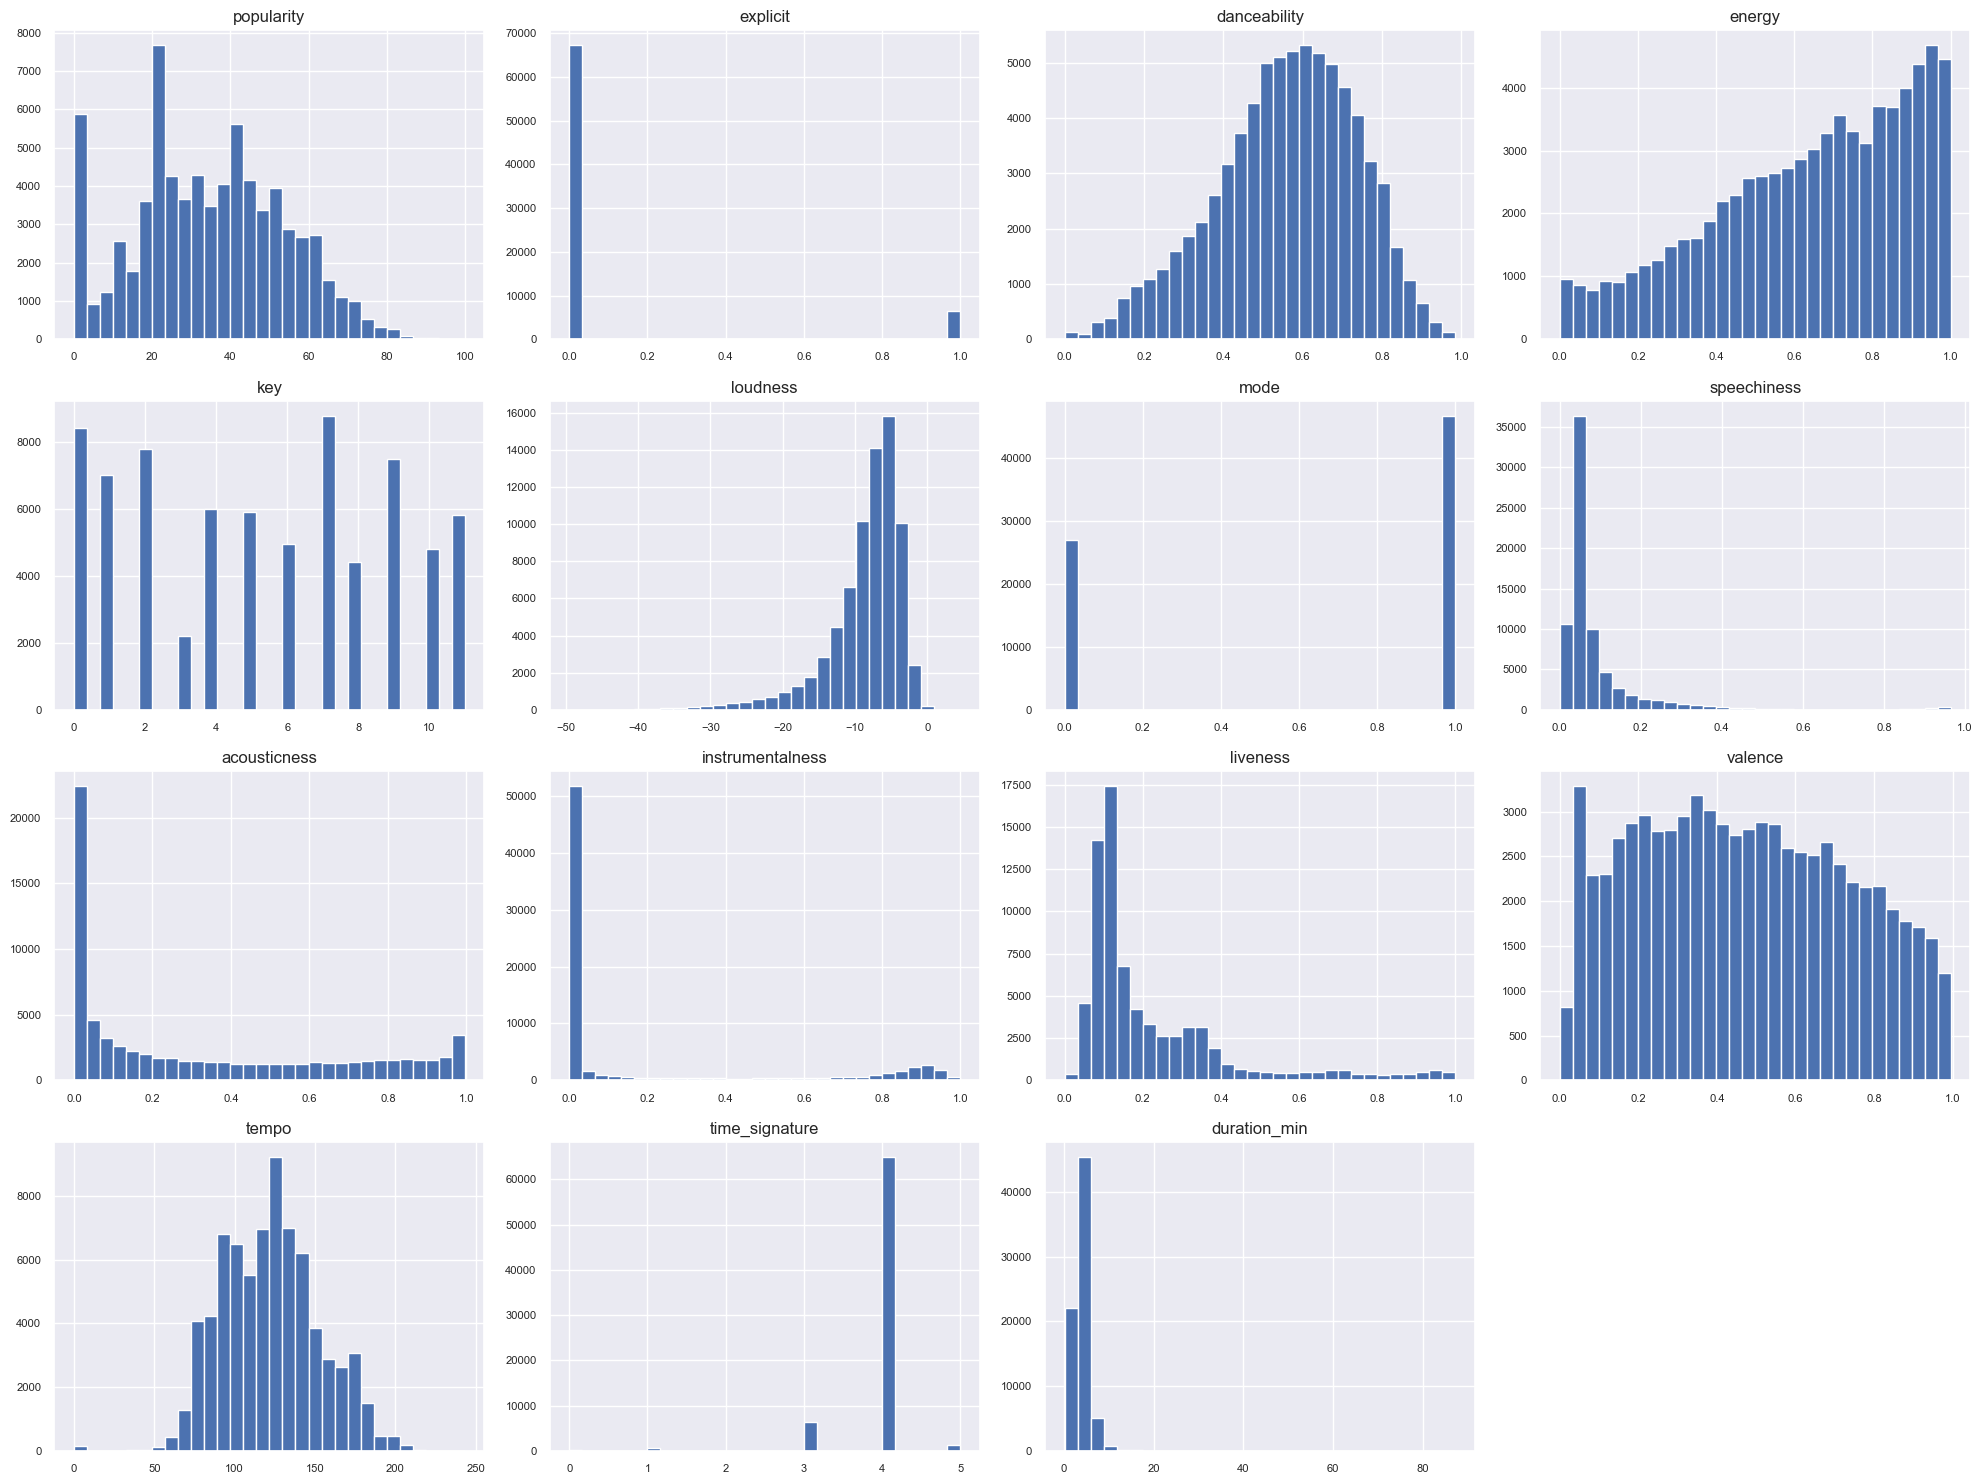

In [135]:
num_cols = data[data.columns[(data.dtypes == 'float64') | (data.dtypes == 'int64')]]
num_cols.shape
sns.set_style('darkgrid')
num_cols.hist(figsize=(20,15), bins=30, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

<h1> EDA of Data </h1>

<h3> Popularity </h3>

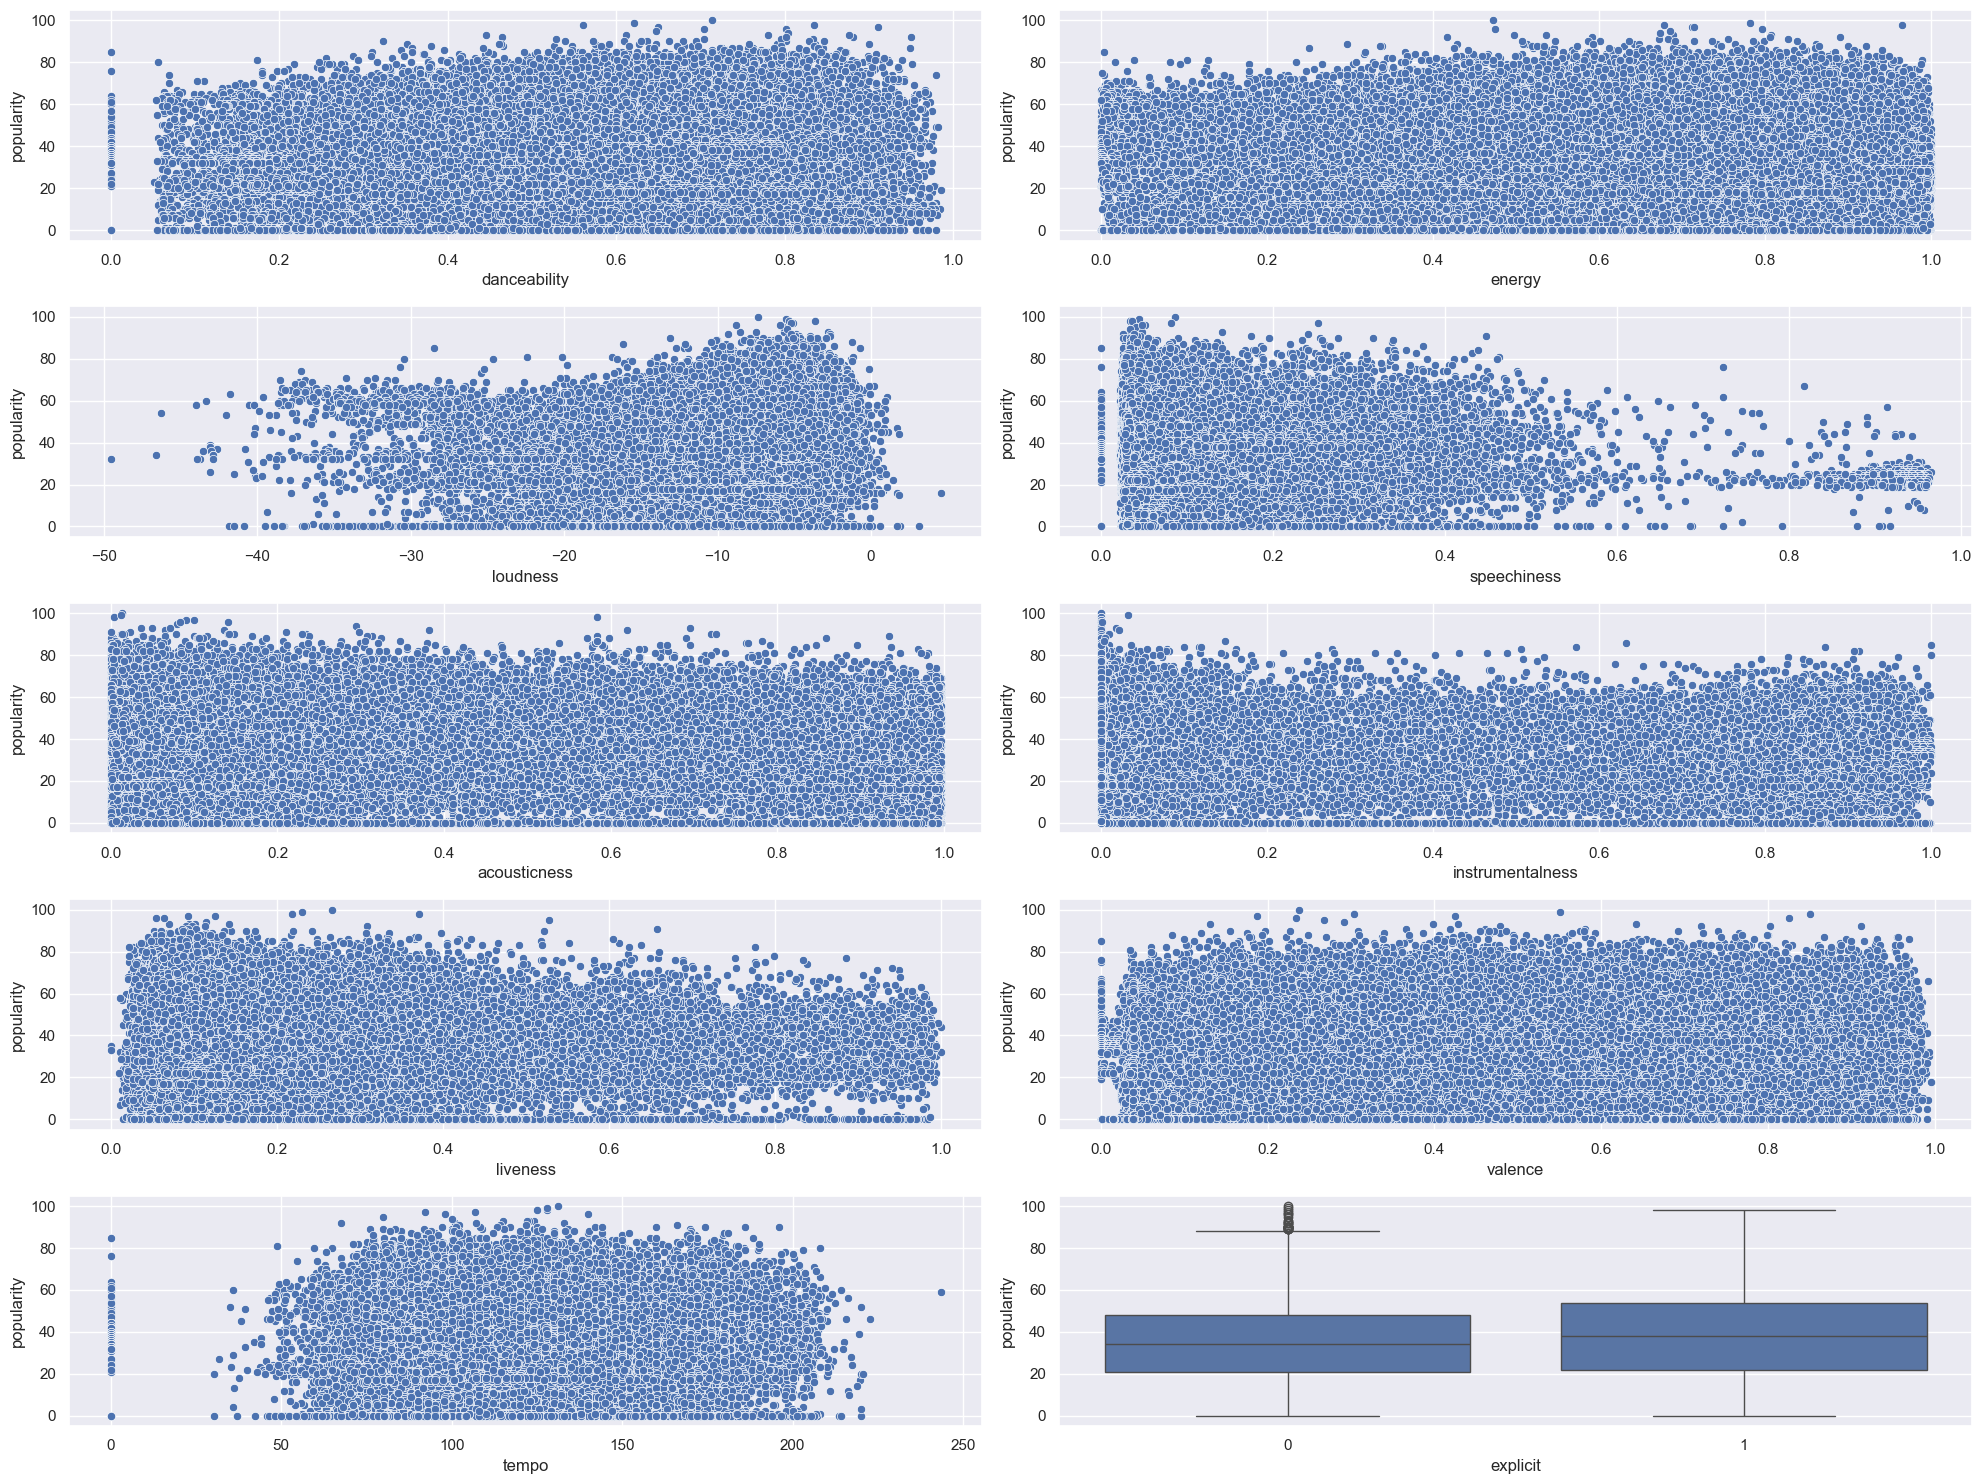

In [136]:
fig, ax = plt.subplots(5, 2, figsize=(20, 15))
sns.scatterplot(x='danceability', y='popularity', data=data, ax=ax[0, 0])
sns.scatterplot(x='energy', y='popularity', data=data, ax=ax[0, 1])
sns.scatterplot(x='loudness', y='popularity', data=data, ax=ax[1, 0])
sns.scatterplot(x='speechiness', y='popularity', data=data, ax=ax[1, 1])
sns.scatterplot(x='acousticness', y='popularity', data=data, ax=ax[2, 0])
sns.scatterplot(x='instrumentalness', y='popularity', data=data, ax=ax[2, 1])
sns.scatterplot(x='liveness', y='popularity', data=data, ax=ax[3, 0])
sns.scatterplot(x='valence', y='popularity', data=data, ax=ax[3, 1])
sns.scatterplot(x='tempo', y='popularity', data=data, ax=ax[4, 0])
sns.boxplot(x='explicit', y='popularity', data=data, ax=ax[4, 1])
plt.tight_layout()
plt.show()

<h3> Danceability </h3>

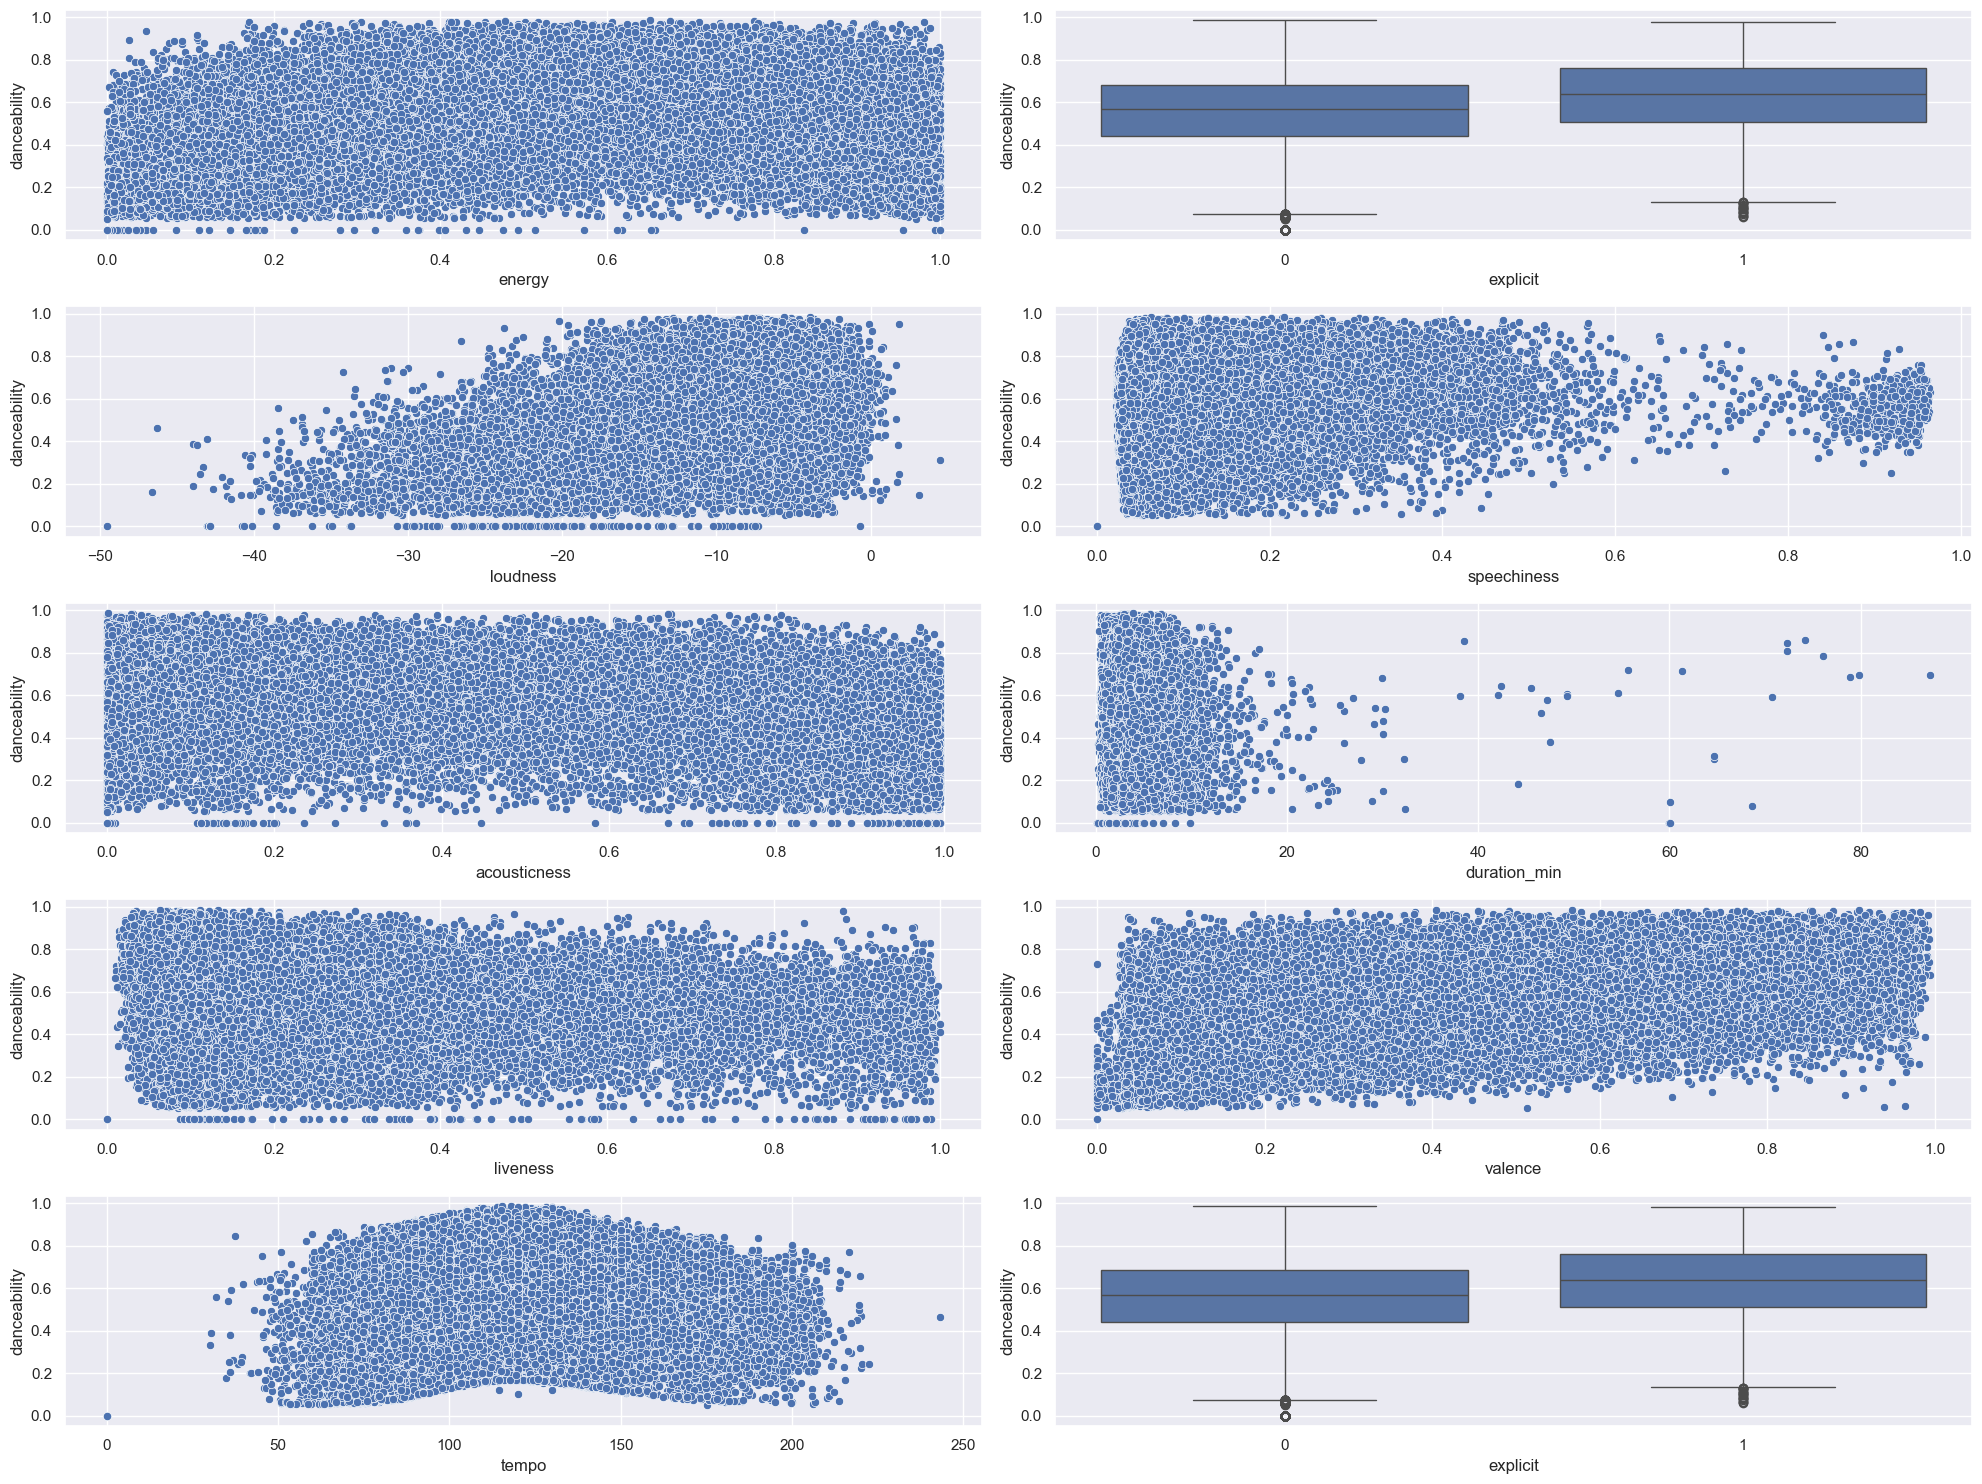

In [137]:
# Series of Plots for danceability
fig, ax = plt.subplots(5, 2, figsize=(20, 15))
sns.scatterplot(x='energy', y='danceability', data=data, ax=ax[0, 0])
sns.boxplot(x='explicit', y='danceability', data=data, ax=ax[0, 1])
sns.scatterplot(x='loudness', y='danceability', data=data, ax=ax[1, 0])
sns.scatterplot(x='speechiness', y='danceability', data=data, ax=ax[1, 1])
sns.scatterplot(x='acousticness', y='danceability', data=data, ax=ax[2, 0])
sns.scatterplot(x='duration_min', y='danceability', data=data, ax=ax[2, 1])
sns.scatterplot(x='liveness', y='danceability', data=data, ax=ax[3, 0])
sns.scatterplot(x='valence', y='danceability', data=data, ax=ax[3, 1])
sns.scatterplot(x='tempo', y='danceability', data=data, ax=ax[4, 0])
sns.boxplot(x='explicit', y='danceability', data=data, ax=ax[4, 1])
plt.tight_layout()

<h3> Energy 

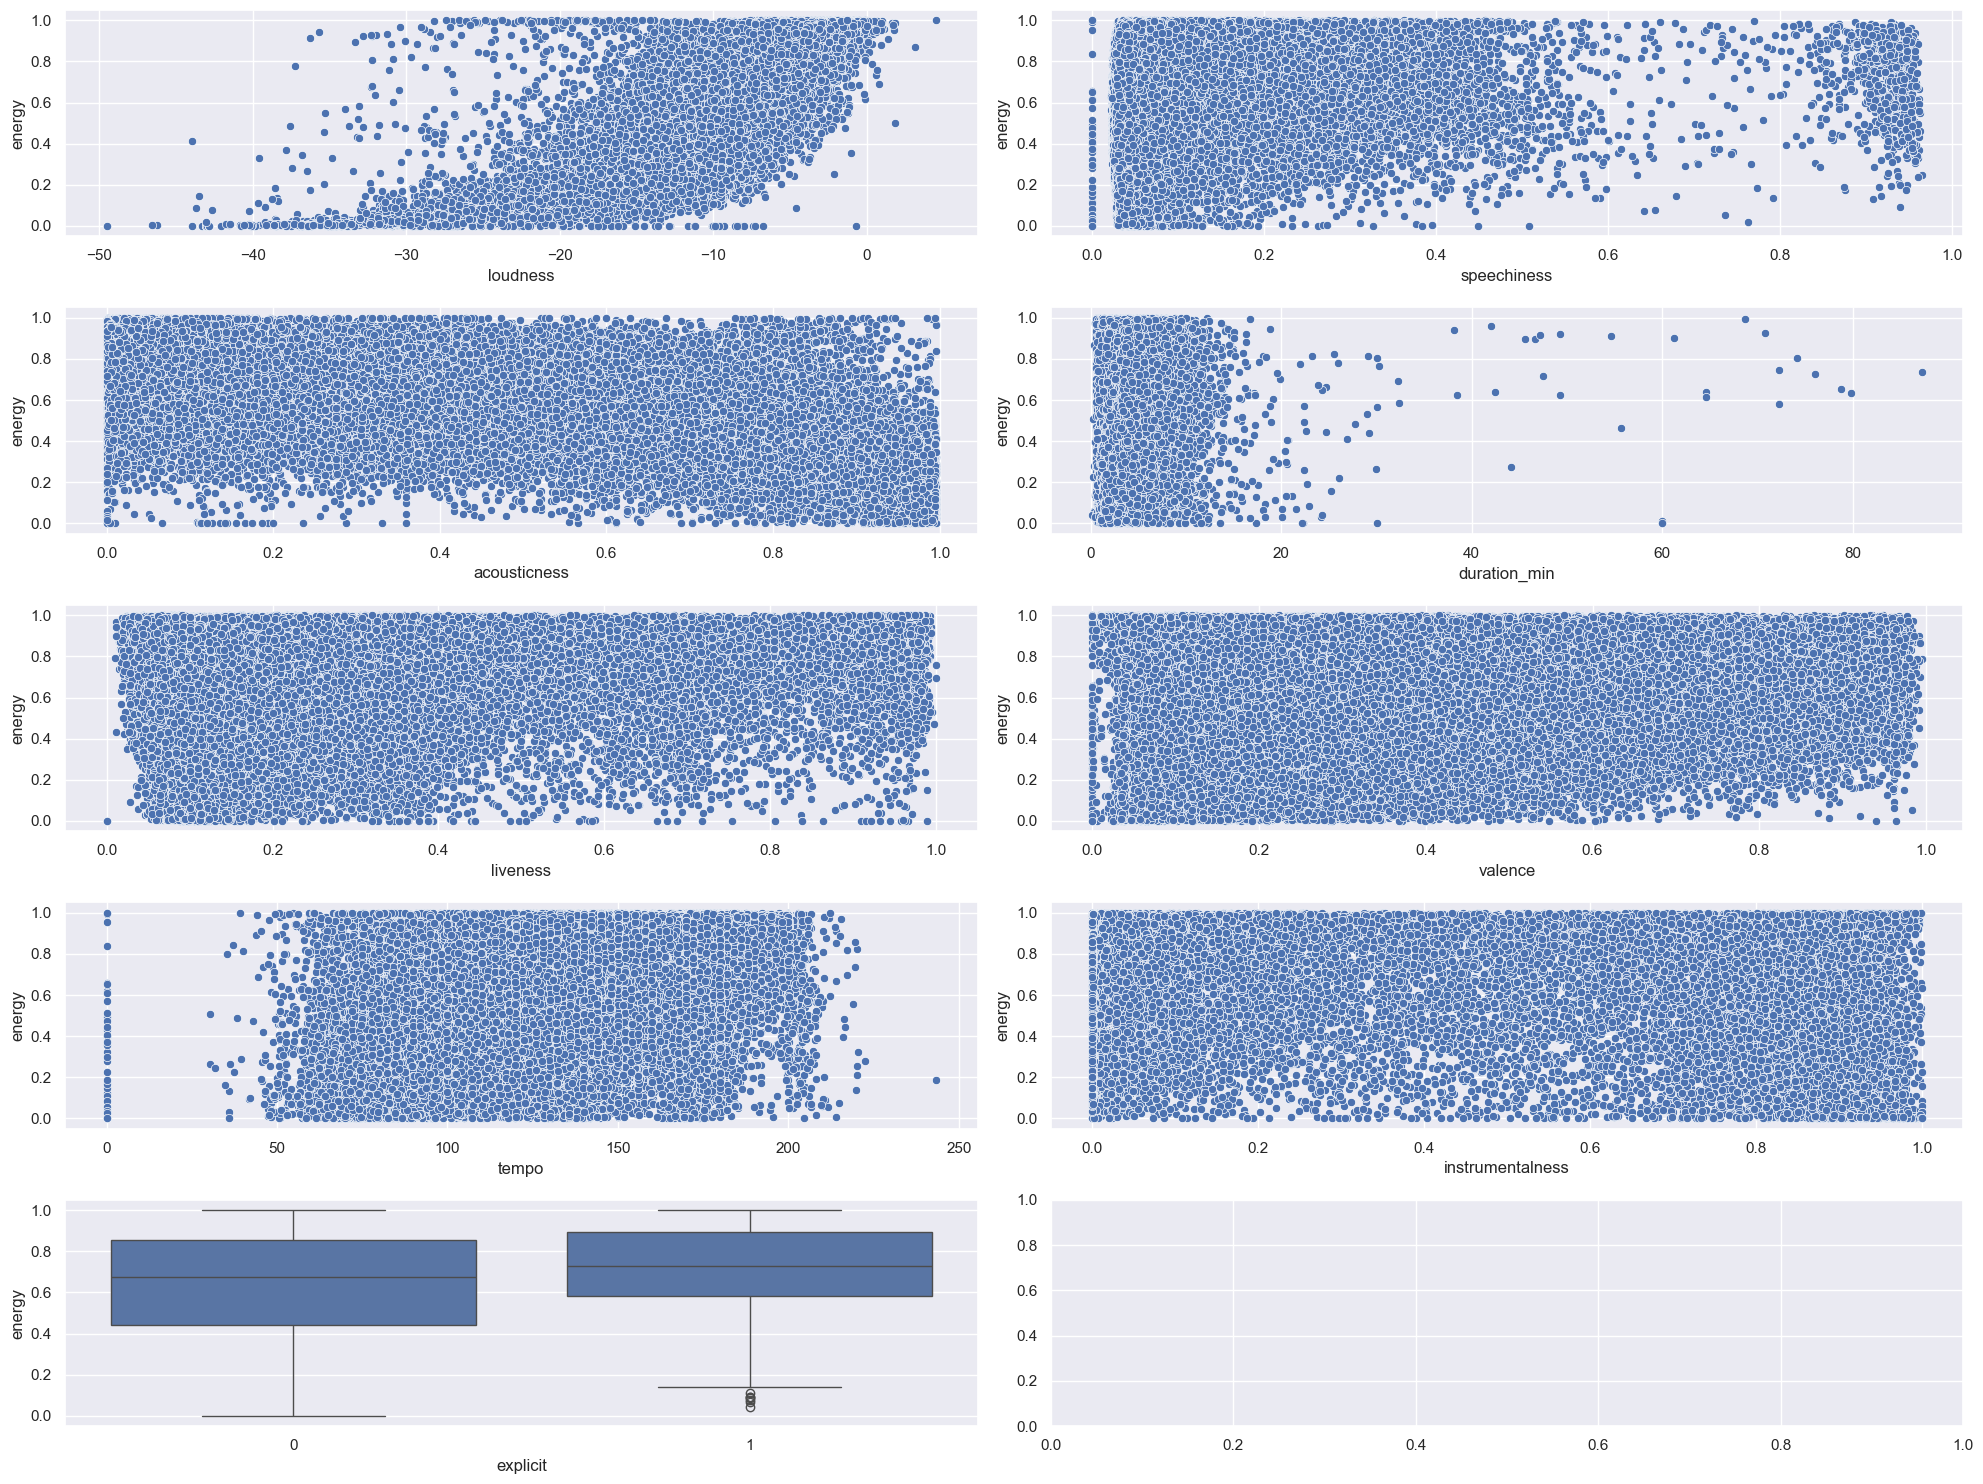

In [138]:
# Series of plots for energy
fig, ax = plt.subplots(5, 2, figsize=(20, 15))
sns.scatterplot(x='loudness', y='energy', data=data, ax=ax[0, 0])
sns.scatterplot(x='speechiness', y='energy', data=data, ax=ax[0, 1])
sns.scatterplot(x='acousticness', y='energy', data=data, ax=ax[1, 0])
sns.scatterplot(x='duration_min', y='energy', data=data, ax=ax[1, 1])
sns.scatterplot(x='liveness', y='energy', data=data, ax=ax[2, 0])
sns.scatterplot(x='valence', y='energy', data=data, ax=ax[2, 1])
sns.scatterplot(x='tempo', y='energy', data=data, ax=ax[3, 0])
sns.scatterplot(x='instrumentalness', y='energy', data=data, ax=ax[3, 1])
sns.boxplot(x='explicit', y='energy', data=data, ax=ax[4, 0])
plt.tight_layout()

<h3> Loudness

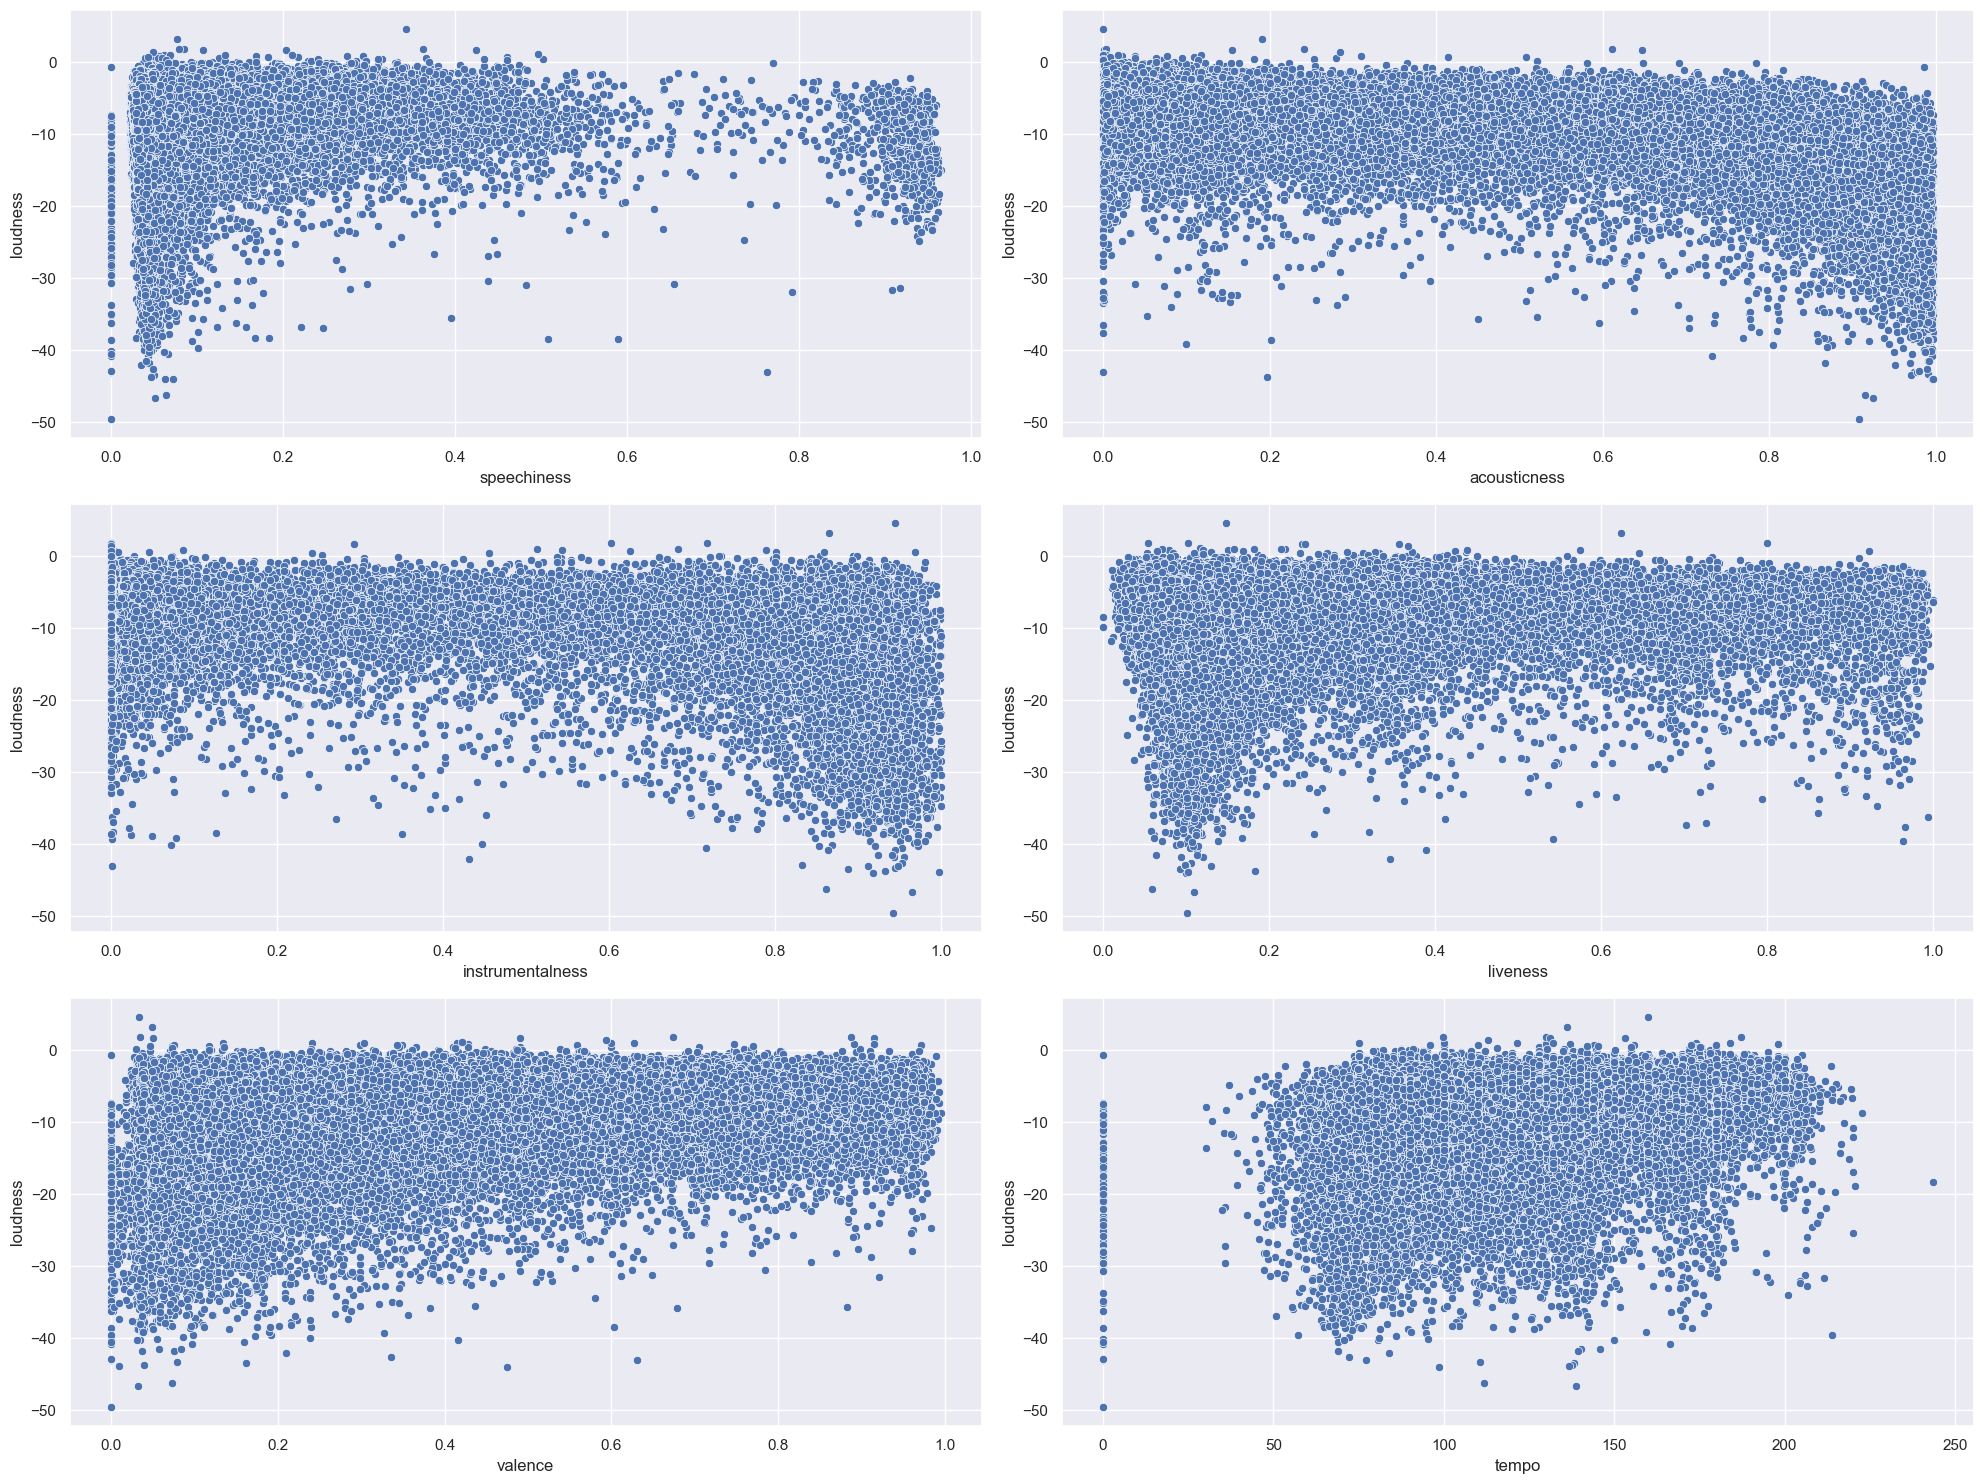

In [139]:
# Series of loudness graphs
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
sns.scatterplot(x='speechiness', y='loudness', data=data, ax=ax[0, 0])
sns.scatterplot(x='acousticness', y='loudness', data=data, ax=ax[0, 1])
sns.scatterplot(x='instrumentalness', y='loudness', data=data, ax=ax[1, 0])
sns.scatterplot(x='liveness', y='loudness', data=data, ax=ax[1, 1])
sns.scatterplot(x='valence', y='loudness', data=data, ax=ax[2, 0])
sns.scatterplot(x='tempo', y='loudness', data=data, ax=ax[2, 1])
plt.tight_layout()

<h3> Speechiness

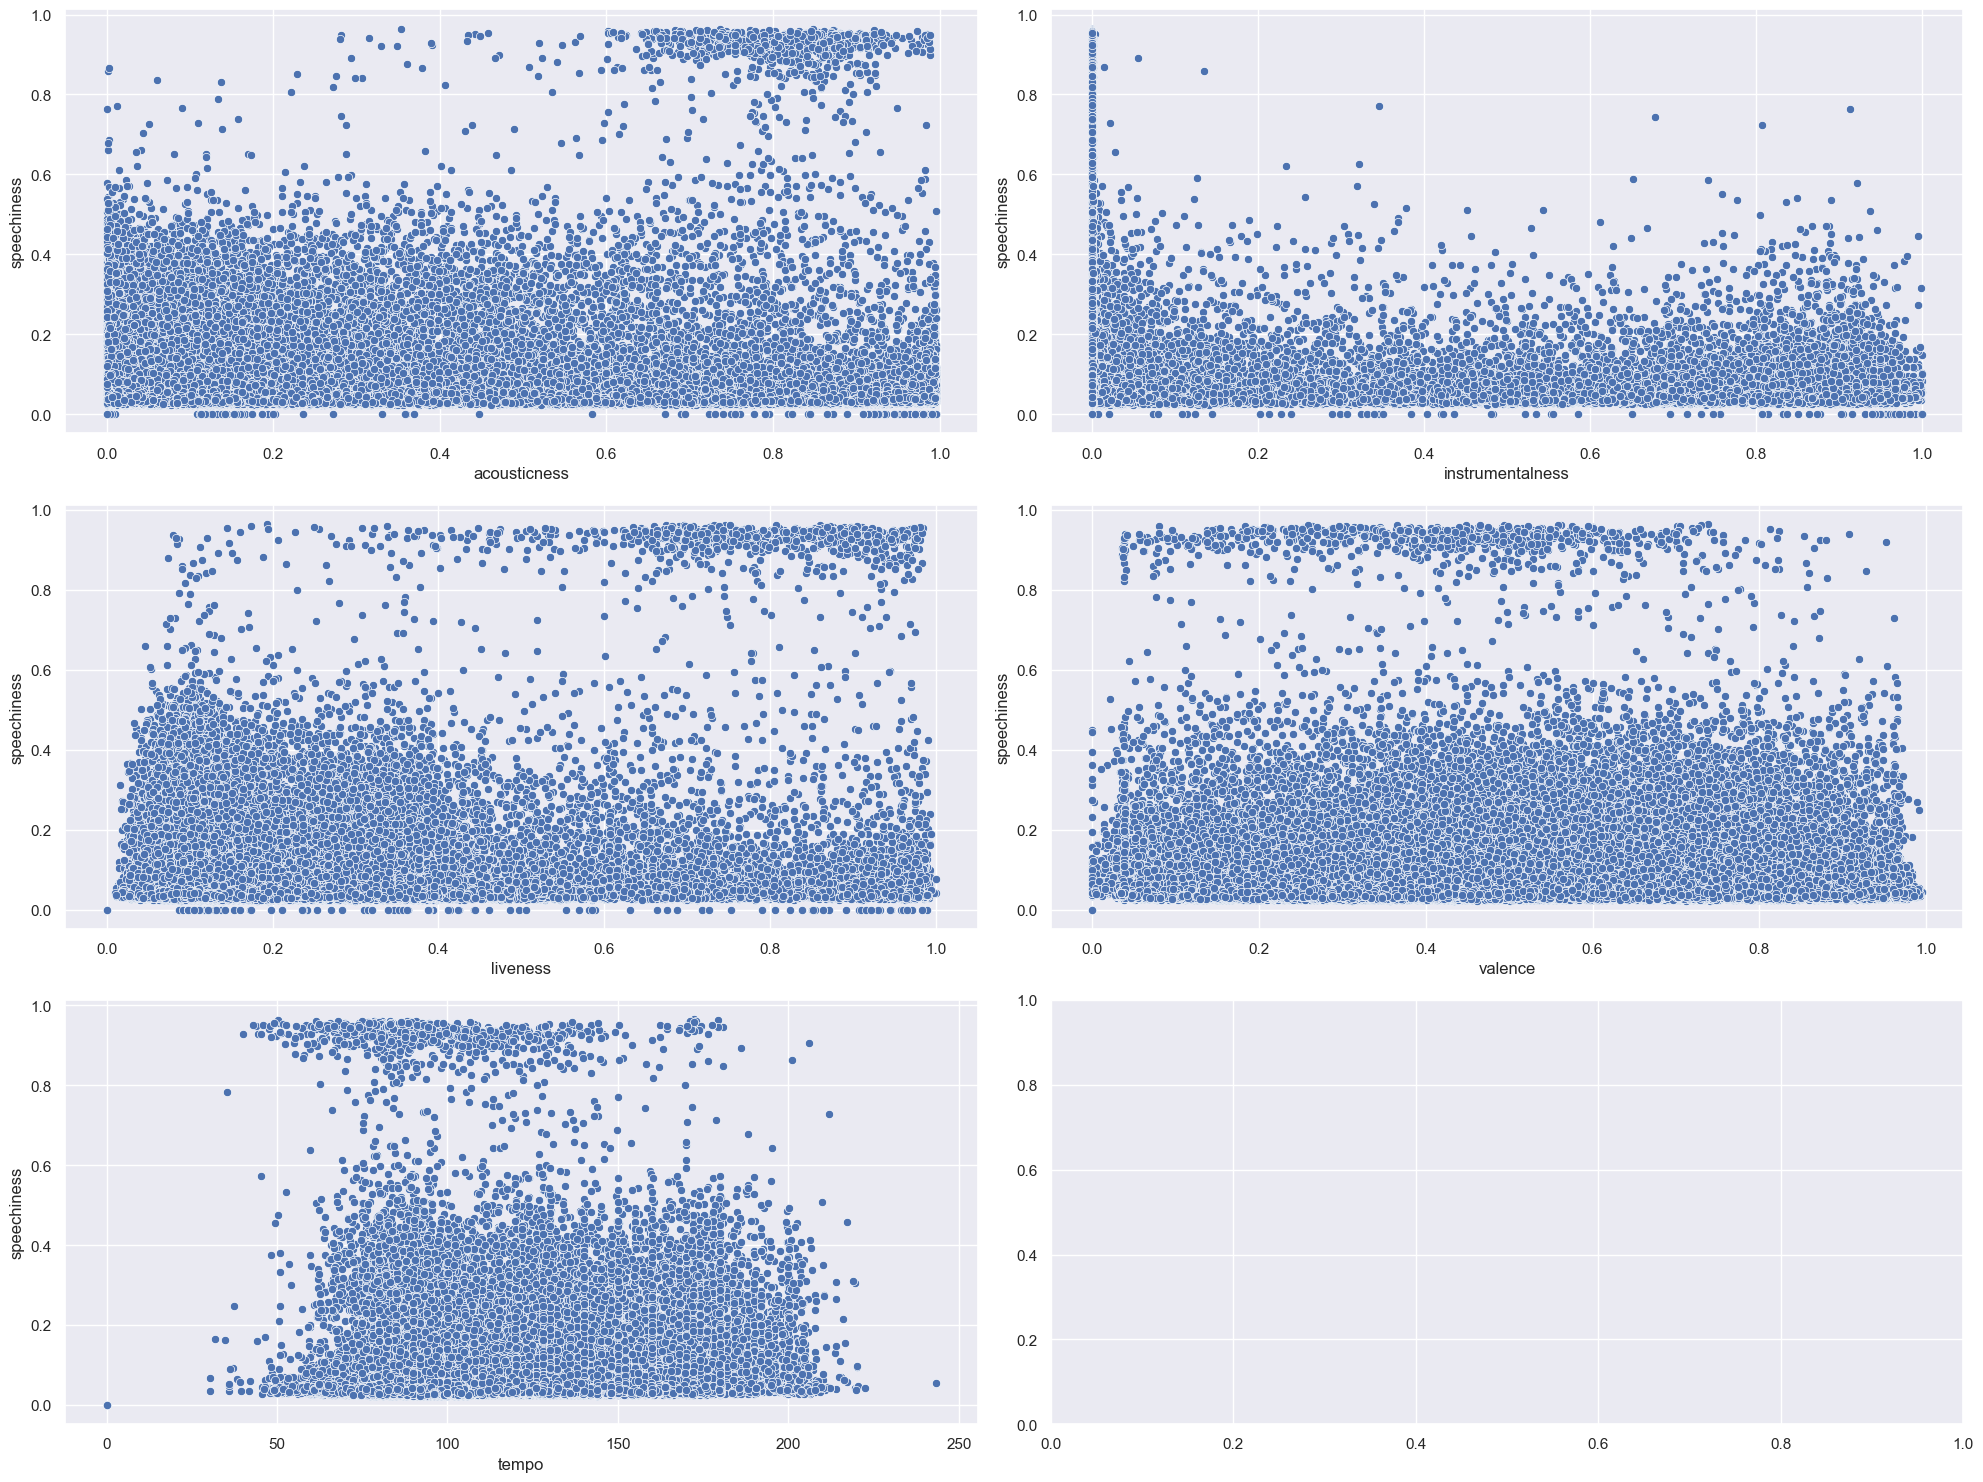

In [140]:
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
sns.scatterplot(x='acousticness', y='speechiness', data=data, ax=ax[0, 0])
sns.scatterplot(x='instrumentalness', y='speechiness', data=data, ax=ax[0, 1])
sns.scatterplot(x='liveness', y='speechiness', data=data, ax=ax[1, 0])
sns.scatterplot(x='valence', y='speechiness', data=data, ax=ax[1, 1])
sns.scatterplot(x='tempo', y='speechiness', data=data, ax=ax[2, 0])
plt.tight_layout()

<h1> Correlation Analysis </h1>

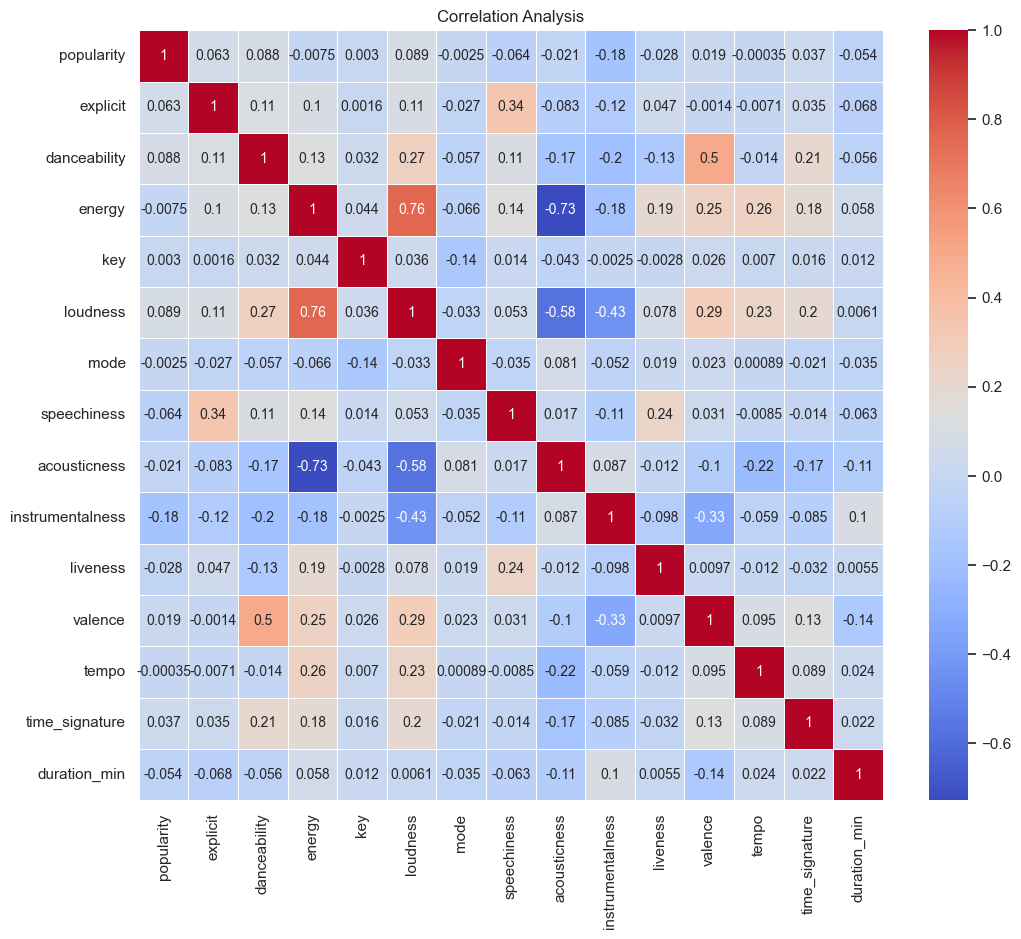

In [141]:
corr_mat = data.select_dtypes(include=["int", "float"]).corr()

# Adjusting figure visuals
plt.figure(figsize=(12, 10), facecolor='white', edgecolor='black')
ax = plt.axes()
ax.set_facecolor('#F2EAC5')
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Analysis')
plt.show()

Observations:
There is a strong positive correlation between "loudness" and "energy".

There is a strong negative correlation between "acousticness" and "energy".

There is a strong negative correlation between "acousticness" and "loudness".

There is a negative correlation between "instrumentalness" and "loudness".

There is a weak positive correlation between "valence" (positiveness) and "danceability".

There is a weak positive correlation between "speechiness" and "explicit".

<h1> Cluster Analysis

In [142]:
num_cols = data[data.columns[(data.dtypes == 'float64') | (data.dtypes == 'int64')]]
num_cols.shape

(73608, 15)

In [143]:
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73608 entries, 0 to 113999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        73608 non-null  int64  
 1   explicit          73608 non-null  int64  
 2   danceability      73608 non-null  float64
 3   energy            73608 non-null  float64
 4   key               73608 non-null  int64  
 5   loudness          73608 non-null  float64
 6   mode              73608 non-null  int64  
 7   speechiness       73608 non-null  float64
 8   acousticness      73608 non-null  float64
 9   instrumentalness  73608 non-null  float64
 10  liveness          73608 non-null  float64
 11  valence           73608 non-null  float64
 12  tempo             73608 non-null  float64
 13  time_signature    73608 non-null  int64  
 14  duration_min      73608 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 9.0 MB


In [144]:
features = data[['danceability','energy', 'loudness', 'valence', 'tempo']] # features selected by refering correlation matrix 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
data['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [145]:
genre_to_category = {

    'edm': 'Electronic Modern Music', 
    'house': 'Electronic Modern Music', 
    'electro': 'Electronic Modern Music', 
    'trance': 'Electronic Modern Music', 
    'techno': 'Electronic Modern Music', 
    'dubstep': 'Electronic Modern Music', 
    'drum-and-bass': 'Electronic Modern Music', 
    'deep-house': 'Electronic Modern Music', 
    'detroit-techno': 'Electronic Modern Music', 
    'minimal-techno': 'Electronic Modern Music', 
    'progressive-house': 'Electronic Modern Music', 
    'breakbeat': 'Electronic Modern Music',
    
    'alt-rock': 'Rock', 
    'rock': 'Rock', 
    'indie': 'Rock', 
    'indie-pop': 'Rock', 
    'punk': 'Rock', 
    'punk-rock': 'Rock', 
    'hard-rock': 'Rock', 
    'metal': 'Rock', 
    'heavy-metal': 'Rock', 
    'black-metal': 'Rock', 
    'death-metal': 'Rock', 
    'grunge': 'Rock',
    
    'hip-hop': 'Hip-Hop and R&B', 
    'r-n-b': 'Hip-Hop and R&B', 
    'trap': 'Hip-Hop and R&B',
    
    'pop': 'Pop & Modern Music', 
    'electro-pop': 'Pop & Modern Music', 
    'synth-pop': 'Pop & Modern Music', 
    'k-pop': 'Pop & Modern Music', 
    'pop-film': 'Pop & Modern Music', 
    'power-pop': 'Pop & Modern Music',
    
    'latin': 'Latin & Reggae/Dancehall', 
    'reggaeton': 'Latin & Reggae/Dancehall', 
    'salsa': 'Latin & Reggae/Dancehall', 
    'samba': 'Latin & Reggae/Dancehall', 
    'reggae': 'Latin & Reggae/Dancehall', 
    'dancehall': 'Latin & Reggae/Dancehall',
    
    'funk': 'Funk & Disco', 
    'disco': 'Funk & Disco', 
    'groove': 'Funk & Disco',
}

# Map each track to a category
data['music_category'] = data['track_genre'].apply(lambda x: genre_to_category.get(x, 'Other'))
data['music_category'].unique() 

array(['Other', 'Rock', 'Electronic Modern Music',
       'Latin & Reggae/Dancehall', 'Funk & Disco', 'Hip-Hop and R&B',
       'Pop & Modern Music'], dtype=object)

In [146]:
data.sample(5)

artists  \
45340                         Cuco Sánchez;Dueto America   
13691                                  Felix Da Housecat   
41515                                        Lacuna Coil   
41006                                    Håkan Hellström   
57120  Tenma;M.S Krsna;Gana Muthu;Sangita Santhosham;...   

                                             track_name  popularity  explicit  \
45340                                   La Mujer Ladina          26         0   
13691                                 Nitelife Funworld           9         0   
41515                                    Veins of Glass          22         0   
41006                                    Din tid kommer          44         0   
57120  Rangarattinam - From "Natchathiram Nagargiradhu"          55         0   

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
45340         0.428   0.246    3   -12.272     1       0.0459      0.759000   
13691         0.645   0.745    3    -9.735     1       0.1910      0.176000   
41515         0.521   0.755    9    -8.451     0       0.0332      0.011900   
41006         0.495   0.852    0    -5.487     1       0.0451      0.000121   
57120         0.738   0.758    7    -6.439     1       0.1300      0.273000   

       instrumentalness  liveness  valence    tempo  time_signature  \
45340          0.000000    0.2220    0.382   90.679               4   
13691          0.000000    0.3810    0.895  145.946               4   
41515          0.000280    0.1540    0.330  120.089               4   
41006          0.000483    0.1360    0.466  127.962               4   
57120          0.000072    0.0923    0.840   82.482               4   

         track_genre  duration_min music_category  
45340         guitar      3.101217          Other  
13691  chicago-house      1.668883          Other  
41515           goth      5.217100          Other  
41006           goth      4.698167          Other  
57120          indie      4.829450           Rock

In [147]:
kmeans = KMeans(n_clusters=7, random_state=48) 
data['cluster_genre'] = kmeans.fit_predict(scaled_features)
#PCA for visualisation
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

c:\Users\kylem\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


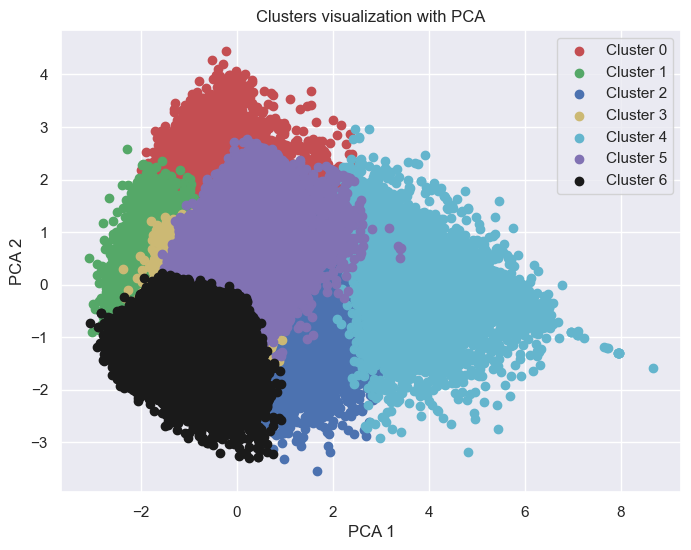

In [149]:
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']  # Colors for the clusters

# Plot each cluster
for i in range(7):
    
    idx = data['cluster_genre'] == i
    plt.scatter(reduced_features[idx, 0], reduced_features[idx, 1], c=colors[i], label=f'Cluster {i}')

# Adjust visuals
plt.title('Clusters visualization with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.show()
